## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 51.6ms	remaining: 51.6s
1:	learn: 0.9301086	total: 54.7ms	remaining: 27.3s
2:	learn: 0.9005637	total: 58.5ms	remaining: 19.4s
3:	learn: 0.8720983	total: 61.7ms	remaining: 15.4s
4:	learn: 0.8467410	total: 64.7ms	remaining: 12.9s
5:	learn: 0.8226672	total: 67.6ms	remaining: 11.2s
6:	learn: 0.7994702	total: 70.7ms	remaining: 10s
7:	learn: 0.7784272	total: 73.9ms	remaining: 9.17s
8:	learn: 0.7602192	total: 77.1ms	remaining: 8.49s
9:	learn: 0.7412421	total: 80.2ms	remaining: 7.94s
10:	learn: 0.7247930	total: 83.3ms	remaining: 7.49s
11:	learn: 0.7089951	total: 86.2ms	remaining: 7.1s
12:	learn: 0.6951345	total: 89.4ms	remaining: 6.79s
13:	learn: 0.6809276	total: 92.2ms	remaining: 6.5s
14:	learn: 0.6692630	total: 95.2ms	remaining: 6.25s
15:	learn: 0.6588323	total: 98.3ms	remaining: 6.05s
16:	learn: 0.6472700	total: 101ms	remaining: 5.86s
17:	learn: 0.6379982	total: 104ms	remaining: 5.68s
18:	learn: 0.6294674	total: 107ms	remaining: 5.53s

41:	learn: 0.5170220	total: 174ms	remaining: 3.97s
42:	learn: 0.5141148	total: 177ms	remaining: 3.94s
43:	learn: 0.5116444	total: 180ms	remaining: 3.9s
44:	learn: 0.5100547	total: 182ms	remaining: 3.87s
45:	learn: 0.5069096	total: 185ms	remaining: 3.84s
46:	learn: 0.5051685	total: 188ms	remaining: 3.81s
47:	learn: 0.5033968	total: 191ms	remaining: 3.79s
48:	learn: 0.5012433	total: 194ms	remaining: 3.76s
49:	learn: 0.4986132	total: 196ms	remaining: 3.73s
50:	learn: 0.4968022	total: 199ms	remaining: 3.7s
51:	learn: 0.4951632	total: 202ms	remaining: 3.67s
52:	learn: 0.4928924	total: 204ms	remaining: 3.65s
53:	learn: 0.4917272	total: 207ms	remaining: 3.63s
54:	learn: 0.4895079	total: 210ms	remaining: 3.61s
55:	learn: 0.4881884	total: 213ms	remaining: 3.58s
56:	learn: 0.4861566	total: 215ms	remaining: 3.56s
57:	learn: 0.4850201	total: 219ms	remaining: 3.55s
58:	learn: 0.4840055	total: 222ms	remaining: 3.53s
59:	learn: 0.4824455	total: 224ms	remaining: 3.52s
60:	learn: 0.4809744	total: 228ms

108:	learn: 0.4440936	total: 367ms	remaining: 3s
109:	learn: 0.4435519	total: 370ms	remaining: 2.99s
110:	learn: 0.4431075	total: 373ms	remaining: 2.99s
111:	learn: 0.4425498	total: 376ms	remaining: 2.98s
112:	learn: 0.4419106	total: 378ms	remaining: 2.97s
113:	learn: 0.4414425	total: 381ms	remaining: 2.96s
114:	learn: 0.4407446	total: 384ms	remaining: 2.96s
115:	learn: 0.4402011	total: 387ms	remaining: 2.95s
116:	learn: 0.4398559	total: 390ms	remaining: 2.94s
117:	learn: 0.4392990	total: 393ms	remaining: 2.94s
118:	learn: 0.4389153	total: 400ms	remaining: 2.96s
119:	learn: 0.4383331	total: 403ms	remaining: 2.96s
120:	learn: 0.4378136	total: 412ms	remaining: 2.99s
121:	learn: 0.4375553	total: 415ms	remaining: 2.99s
122:	learn: 0.4369995	total: 418ms	remaining: 2.98s
123:	learn: 0.4366325	total: 422ms	remaining: 2.98s
124:	learn: 0.4362823	total: 425ms	remaining: 2.97s
125:	learn: 0.4359535	total: 427ms	remaining: 2.96s
126:	learn: 0.4353142	total: 430ms	remaining: 2.96s
127:	learn: 0.4

171:	learn: 0.4156228	total: 558ms	remaining: 2.69s
172:	learn: 0.4153041	total: 561ms	remaining: 2.68s
173:	learn: 0.4148857	total: 564ms	remaining: 2.68s
174:	learn: 0.4144190	total: 567ms	remaining: 2.67s
175:	learn: 0.4140875	total: 570ms	remaining: 2.67s
176:	learn: 0.4136755	total: 573ms	remaining: 2.66s
177:	learn: 0.4133860	total: 576ms	remaining: 2.66s
178:	learn: 0.4129780	total: 579ms	remaining: 2.66s
179:	learn: 0.4122907	total: 582ms	remaining: 2.65s
180:	learn: 0.4119188	total: 585ms	remaining: 2.65s
181:	learn: 0.4115412	total: 588ms	remaining: 2.64s
182:	learn: 0.4112620	total: 591ms	remaining: 2.64s
183:	learn: 0.4107734	total: 593ms	remaining: 2.63s
184:	learn: 0.4104881	total: 596ms	remaining: 2.63s
185:	learn: 0.4100009	total: 600ms	remaining: 2.63s
186:	learn: 0.4096453	total: 602ms	remaining: 2.62s
187:	learn: 0.4093395	total: 605ms	remaining: 2.61s
188:	learn: 0.4090020	total: 608ms	remaining: 2.61s
189:	learn: 0.4085981	total: 611ms	remaining: 2.6s
190:	learn: 0

230:	learn: 0.3957018	total: 738ms	remaining: 2.46s
231:	learn: 0.3954162	total: 741ms	remaining: 2.45s
232:	learn: 0.3951665	total: 744ms	remaining: 2.45s
233:	learn: 0.3949269	total: 747ms	remaining: 2.44s
234:	learn: 0.3945894	total: 750ms	remaining: 2.44s
235:	learn: 0.3944181	total: 752ms	remaining: 2.44s
236:	learn: 0.3941497	total: 755ms	remaining: 2.43s
237:	learn: 0.3939819	total: 759ms	remaining: 2.43s
238:	learn: 0.3938322	total: 762ms	remaining: 2.42s
239:	learn: 0.3935463	total: 765ms	remaining: 2.42s
240:	learn: 0.3933166	total: 768ms	remaining: 2.42s
241:	learn: 0.3930992	total: 772ms	remaining: 2.42s
242:	learn: 0.3928898	total: 774ms	remaining: 2.41s
243:	learn: 0.3926199	total: 777ms	remaining: 2.41s
244:	learn: 0.3923955	total: 780ms	remaining: 2.4s
245:	learn: 0.3922312	total: 783ms	remaining: 2.4s
246:	learn: 0.3919499	total: 786ms	remaining: 2.4s
247:	learn: 0.3917420	total: 789ms	remaining: 2.39s
248:	learn: 0.3915186	total: 792ms	remaining: 2.39s
249:	learn: 0.3

292:	learn: 0.3812172	total: 930ms	remaining: 2.24s
293:	learn: 0.3809978	total: 933ms	remaining: 2.24s
294:	learn: 0.3807825	total: 936ms	remaining: 2.23s
295:	learn: 0.3805940	total: 938ms	remaining: 2.23s
296:	learn: 0.3801959	total: 941ms	remaining: 2.23s
297:	learn: 0.3799439	total: 944ms	remaining: 2.22s
298:	learn: 0.3797228	total: 947ms	remaining: 2.22s
299:	learn: 0.3795554	total: 950ms	remaining: 2.22s
300:	learn: 0.3793733	total: 954ms	remaining: 2.21s
301:	learn: 0.3791607	total: 957ms	remaining: 2.21s
302:	learn: 0.3789297	total: 959ms	remaining: 2.21s
303:	learn: 0.3787482	total: 963ms	remaining: 2.2s
304:	learn: 0.3786528	total: 965ms	remaining: 2.2s
305:	learn: 0.3784406	total: 969ms	remaining: 2.2s
306:	learn: 0.3782934	total: 972ms	remaining: 2.19s
307:	learn: 0.3781631	total: 974ms	remaining: 2.19s
308:	learn: 0.3779278	total: 977ms	remaining: 2.18s
309:	learn: 0.3777358	total: 980ms	remaining: 2.18s
310:	learn: 0.3775809	total: 982ms	remaining: 2.18s
311:	learn: 0.3

356:	learn: 0.3691107	total: 1.12s	remaining: 2.02s
357:	learn: 0.3689645	total: 1.13s	remaining: 2.02s
358:	learn: 0.3687886	total: 1.13s	remaining: 2.02s
359:	learn: 0.3686485	total: 1.13s	remaining: 2.01s
360:	learn: 0.3685749	total: 1.13s	remaining: 2.01s
361:	learn: 0.3683909	total: 1.14s	remaining: 2s
362:	learn: 0.3682710	total: 1.14s	remaining: 2s
363:	learn: 0.3681254	total: 1.14s	remaining: 2s
364:	learn: 0.3679761	total: 1.15s	remaining: 2s
365:	learn: 0.3677932	total: 1.15s	remaining: 1.99s
366:	learn: 0.3676022	total: 1.15s	remaining: 1.99s
367:	learn: 0.3674148	total: 1.16s	remaining: 1.98s
368:	learn: 0.3673439	total: 1.16s	remaining: 1.98s
369:	learn: 0.3671985	total: 1.16s	remaining: 1.98s
370:	learn: 0.3670563	total: 1.16s	remaining: 1.97s
371:	learn: 0.3669128	total: 1.17s	remaining: 1.97s
372:	learn: 0.3668381	total: 1.17s	remaining: 1.97s
373:	learn: 0.3666564	total: 1.17s	remaining: 1.96s
374:	learn: 0.3663789	total: 1.18s	remaining: 1.96s
375:	learn: 0.3661576	to

419:	learn: 0.3589470	total: 1.31s	remaining: 1.81s
420:	learn: 0.3587972	total: 1.32s	remaining: 1.81s
421:	learn: 0.3586831	total: 1.32s	remaining: 1.81s
422:	learn: 0.3585620	total: 1.32s	remaining: 1.8s
423:	learn: 0.3584427	total: 1.32s	remaining: 1.8s
424:	learn: 0.3583044	total: 1.33s	remaining: 1.8s
425:	learn: 0.3581698	total: 1.33s	remaining: 1.79s
426:	learn: 0.3580461	total: 1.33s	remaining: 1.79s
427:	learn: 0.3579182	total: 1.34s	remaining: 1.79s
428:	learn: 0.3577521	total: 1.34s	remaining: 1.78s
429:	learn: 0.3576138	total: 1.34s	remaining: 1.78s
430:	learn: 0.3575528	total: 1.34s	remaining: 1.78s
431:	learn: 0.3574686	total: 1.35s	remaining: 1.77s
432:	learn: 0.3572923	total: 1.35s	remaining: 1.77s
433:	learn: 0.3571859	total: 1.35s	remaining: 1.77s
434:	learn: 0.3570185	total: 1.36s	remaining: 1.76s
435:	learn: 0.3568416	total: 1.36s	remaining: 1.76s
436:	learn: 0.3566846	total: 1.37s	remaining: 1.76s
437:	learn: 0.3565875	total: 1.37s	remaining: 1.76s
438:	learn: 0.3

485:	learn: 0.3497143	total: 1.51s	remaining: 1.59s
486:	learn: 0.3496172	total: 1.51s	remaining: 1.59s
487:	learn: 0.3494609	total: 1.51s	remaining: 1.59s
488:	learn: 0.3493200	total: 1.52s	remaining: 1.59s
489:	learn: 0.3491550	total: 1.52s	remaining: 1.58s
490:	learn: 0.3490323	total: 1.53s	remaining: 1.58s
491:	learn: 0.3488767	total: 1.53s	remaining: 1.58s
492:	learn: 0.3487285	total: 1.53s	remaining: 1.58s
493:	learn: 0.3486318	total: 1.53s	remaining: 1.57s
494:	learn: 0.3485016	total: 1.54s	remaining: 1.57s
495:	learn: 0.3484072	total: 1.54s	remaining: 1.57s
496:	learn: 0.3482698	total: 1.54s	remaining: 1.56s
497:	learn: 0.3481630	total: 1.55s	remaining: 1.56s
498:	learn: 0.3480855	total: 1.55s	remaining: 1.55s
499:	learn: 0.3478655	total: 1.55s	remaining: 1.55s
500:	learn: 0.3477966	total: 1.55s	remaining: 1.55s
501:	learn: 0.3476142	total: 1.56s	remaining: 1.54s
502:	learn: 0.3474667	total: 1.56s	remaining: 1.54s
503:	learn: 0.3473844	total: 1.56s	remaining: 1.54s
504:	learn: 

552:	learn: 0.3410901	total: 1.7s	remaining: 1.37s
553:	learn: 0.3409923	total: 1.7s	remaining: 1.37s
554:	learn: 0.3408730	total: 1.71s	remaining: 1.37s
555:	learn: 0.3408310	total: 1.71s	remaining: 1.36s
556:	learn: 0.3407365	total: 1.71s	remaining: 1.36s
557:	learn: 0.3406506	total: 1.71s	remaining: 1.36s
558:	learn: 0.3405352	total: 1.72s	remaining: 1.35s
559:	learn: 0.3404352	total: 1.72s	remaining: 1.35s
560:	learn: 0.3403419	total: 1.73s	remaining: 1.35s
561:	learn: 0.3402836	total: 1.73s	remaining: 1.35s
562:	learn: 0.3402264	total: 1.73s	remaining: 1.34s
563:	learn: 0.3400466	total: 1.74s	remaining: 1.34s
564:	learn: 0.3399235	total: 1.74s	remaining: 1.34s
565:	learn: 0.3398064	total: 1.74s	remaining: 1.33s
566:	learn: 0.3396466	total: 1.74s	remaining: 1.33s
567:	learn: 0.3395531	total: 1.75s	remaining: 1.33s
568:	learn: 0.3394093	total: 1.75s	remaining: 1.32s
569:	learn: 0.3393241	total: 1.75s	remaining: 1.32s
570:	learn: 0.3392368	total: 1.76s	remaining: 1.32s
571:	learn: 0.

615:	learn: 0.3348304	total: 1.89s	remaining: 1.18s
616:	learn: 0.3347009	total: 1.89s	remaining: 1.18s
617:	learn: 0.3346458	total: 1.9s	remaining: 1.17s
618:	learn: 0.3345381	total: 1.9s	remaining: 1.17s
619:	learn: 0.3344101	total: 1.91s	remaining: 1.17s
620:	learn: 0.3343267	total: 1.91s	remaining: 1.17s
621:	learn: 0.3342275	total: 1.91s	remaining: 1.16s
622:	learn: 0.3341456	total: 1.92s	remaining: 1.16s
623:	learn: 0.3340640	total: 1.92s	remaining: 1.16s
624:	learn: 0.3339122	total: 1.92s	remaining: 1.15s
625:	learn: 0.3337503	total: 1.92s	remaining: 1.15s
626:	learn: 0.3336593	total: 1.93s	remaining: 1.15s
627:	learn: 0.3335713	total: 1.93s	remaining: 1.14s
628:	learn: 0.3333915	total: 1.93s	remaining: 1.14s
629:	learn: 0.3333158	total: 1.94s	remaining: 1.14s
630:	learn: 0.3332088	total: 1.94s	remaining: 1.13s
631:	learn: 0.3331129	total: 1.94s	remaining: 1.13s
632:	learn: 0.3330288	total: 1.95s	remaining: 1.13s
633:	learn: 0.3328844	total: 1.95s	remaining: 1.13s
634:	learn: 0.

674:	learn: 0.3286969	total: 2.08s	remaining: 1s
675:	learn: 0.3286108	total: 2.09s	remaining: 1s
676:	learn: 0.3285218	total: 2.09s	remaining: 997ms
677:	learn: 0.3284620	total: 2.09s	remaining: 994ms
678:	learn: 0.3283999	total: 2.1s	remaining: 991ms
679:	learn: 0.3283506	total: 2.1s	remaining: 987ms
680:	learn: 0.3282208	total: 2.11s	remaining: 990ms
681:	learn: 0.3281020	total: 2.12s	remaining: 987ms
682:	learn: 0.3280328	total: 2.12s	remaining: 984ms
683:	learn: 0.3279574	total: 2.12s	remaining: 981ms
684:	learn: 0.3278928	total: 2.13s	remaining: 979ms
685:	learn: 0.3278094	total: 2.14s	remaining: 979ms
686:	learn: 0.3277178	total: 2.14s	remaining: 975ms
687:	learn: 0.3276684	total: 2.15s	remaining: 976ms
688:	learn: 0.3275537	total: 2.15s	remaining: 973ms
689:	learn: 0.3274808	total: 2.17s	remaining: 974ms
690:	learn: 0.3273839	total: 2.17s	remaining: 971ms
691:	learn: 0.3272773	total: 2.18s	remaining: 969ms
692:	learn: 0.3272088	total: 2.18s	remaining: 967ms
693:	learn: 0.327121

718:	learn: 0.3247371	total: 2.27s	remaining: 888ms
719:	learn: 0.3246676	total: 2.28s	remaining: 885ms
720:	learn: 0.3245862	total: 2.28s	remaining: 882ms
721:	learn: 0.3245270	total: 2.28s	remaining: 879ms
722:	learn: 0.3244558	total: 2.29s	remaining: 875ms
723:	learn: 0.3243835	total: 2.29s	remaining: 872ms
724:	learn: 0.3242957	total: 2.29s	remaining: 869ms
725:	learn: 0.3242628	total: 2.29s	remaining: 866ms
726:	learn: 0.3242076	total: 2.3s	remaining: 862ms
727:	learn: 0.3240923	total: 2.3s	remaining: 859ms
728:	learn: 0.3240148	total: 2.3s	remaining: 856ms
729:	learn: 0.3239014	total: 2.31s	remaining: 853ms
730:	learn: 0.3237918	total: 2.31s	remaining: 850ms
731:	learn: 0.3236654	total: 2.31s	remaining: 846ms
732:	learn: 0.3235938	total: 2.31s	remaining: 843ms
733:	learn: 0.3235120	total: 2.32s	remaining: 840ms
734:	learn: 0.3234421	total: 2.32s	remaining: 836ms
735:	learn: 0.3233367	total: 2.32s	remaining: 833ms
736:	learn: 0.3232438	total: 2.33s	remaining: 830ms
737:	learn: 0.3

783:	learn: 0.3190255	total: 2.47s	remaining: 680ms
784:	learn: 0.3189403	total: 2.47s	remaining: 677ms
785:	learn: 0.3188715	total: 2.47s	remaining: 673ms
786:	learn: 0.3188016	total: 2.48s	remaining: 670ms
787:	learn: 0.3187670	total: 2.48s	remaining: 667ms
788:	learn: 0.3186601	total: 2.48s	remaining: 664ms
789:	learn: 0.3185886	total: 2.48s	remaining: 660ms
790:	learn: 0.3185418	total: 2.49s	remaining: 657ms
791:	learn: 0.3184514	total: 2.49s	remaining: 654ms
792:	learn: 0.3183529	total: 2.49s	remaining: 651ms
793:	learn: 0.3182569	total: 2.5s	remaining: 648ms
794:	learn: 0.3181932	total: 2.5s	remaining: 644ms
795:	learn: 0.3180848	total: 2.5s	remaining: 641ms
796:	learn: 0.3180327	total: 2.5s	remaining: 638ms
797:	learn: 0.3179305	total: 2.51s	remaining: 635ms
798:	learn: 0.3178456	total: 2.51s	remaining: 631ms
799:	learn: 0.3177655	total: 2.51s	remaining: 628ms
800:	learn: 0.3176826	total: 2.52s	remaining: 625ms
801:	learn: 0.3176217	total: 2.52s	remaining: 622ms
802:	learn: 0.31

849:	learn: 0.3137772	total: 2.66s	remaining: 469ms
850:	learn: 0.3137138	total: 2.66s	remaining: 466ms
851:	learn: 0.3136859	total: 2.67s	remaining: 463ms
852:	learn: 0.3136054	total: 2.67s	remaining: 460ms
853:	learn: 0.3135239	total: 2.67s	remaining: 457ms
854:	learn: 0.3134711	total: 2.67s	remaining: 453ms
855:	learn: 0.3134242	total: 2.68s	remaining: 450ms
856:	learn: 0.3133249	total: 2.68s	remaining: 447ms
857:	learn: 0.3132311	total: 2.68s	remaining: 444ms
858:	learn: 0.3131446	total: 2.68s	remaining: 441ms
859:	learn: 0.3130587	total: 2.69s	remaining: 438ms
860:	learn: 0.3129229	total: 2.69s	remaining: 434ms
861:	learn: 0.3128651	total: 2.69s	remaining: 431ms
862:	learn: 0.3127812	total: 2.69s	remaining: 428ms
863:	learn: 0.3126884	total: 2.7s	remaining: 425ms
864:	learn: 0.3126358	total: 2.7s	remaining: 421ms
865:	learn: 0.3125933	total: 2.7s	remaining: 418ms
866:	learn: 0.3125160	total: 2.71s	remaining: 415ms
867:	learn: 0.3124401	total: 2.71s	remaining: 412ms
868:	learn: 0.3

915:	learn: 0.3090199	total: 2.85s	remaining: 261ms
916:	learn: 0.3089417	total: 2.85s	remaining: 258ms
917:	learn: 0.3088562	total: 2.85s	remaining: 255ms
918:	learn: 0.3087578	total: 2.85s	remaining: 252ms
919:	learn: 0.3086793	total: 2.86s	remaining: 248ms
920:	learn: 0.3086255	total: 2.86s	remaining: 245ms
921:	learn: 0.3085073	total: 2.86s	remaining: 242ms
922:	learn: 0.3084388	total: 2.87s	remaining: 239ms
923:	learn: 0.3083752	total: 2.87s	remaining: 236ms
924:	learn: 0.3082889	total: 2.87s	remaining: 233ms
925:	learn: 0.3081901	total: 2.87s	remaining: 230ms
926:	learn: 0.3081106	total: 2.88s	remaining: 227ms
927:	learn: 0.3080422	total: 2.88s	remaining: 223ms
928:	learn: 0.3079770	total: 2.88s	remaining: 220ms
929:	learn: 0.3079316	total: 2.88s	remaining: 217ms
930:	learn: 0.3078660	total: 2.89s	remaining: 214ms
931:	learn: 0.3078147	total: 2.89s	remaining: 211ms
932:	learn: 0.3077165	total: 2.89s	remaining: 208ms
933:	learn: 0.3076207	total: 2.9s	remaining: 205ms
934:	learn: 0

982:	learn: 0.3041077	total: 3.04s	remaining: 52.5ms
983:	learn: 0.3040665	total: 3.04s	remaining: 49.4ms
984:	learn: 0.3040237	total: 3.04s	remaining: 46.4ms
985:	learn: 0.3039532	total: 3.05s	remaining: 43.3ms
986:	learn: 0.3038723	total: 3.05s	remaining: 40.2ms
987:	learn: 0.3038141	total: 3.05s	remaining: 37.1ms
988:	learn: 0.3037455	total: 3.06s	remaining: 34ms
989:	learn: 0.3036820	total: 3.06s	remaining: 30.9ms
990:	learn: 0.3036165	total: 3.06s	remaining: 27.8ms
991:	learn: 0.3035759	total: 3.06s	remaining: 24.7ms
992:	learn: 0.3035124	total: 3.07s	remaining: 21.6ms
993:	learn: 0.3034295	total: 3.07s	remaining: 18.5ms
994:	learn: 0.3033612	total: 3.07s	remaining: 15.4ms
995:	learn: 0.3033209	total: 3.07s	remaining: 12.3ms
996:	learn: 0.3032659	total: 3.08s	remaining: 9.26ms
997:	learn: 0.3032189	total: 3.08s	remaining: 6.17ms
998:	learn: 0.3031594	total: 3.08s	remaining: 3.09ms
999:	learn: 0.3030916	total: 3.09s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
972919.5777708719


#### Sanity Checks 

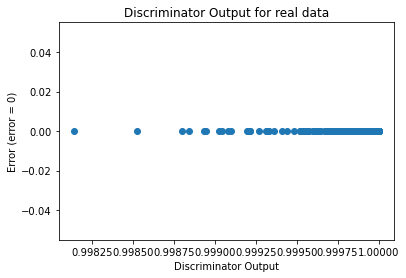

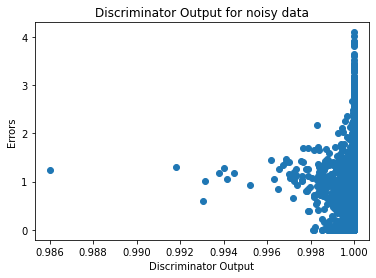

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)